In [172]:
import pandas as pd 
import numpy as np 
import env as e
import prepare as pr
import acquire as ac
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
import sklearn.metrics as met

# Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

1)What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2)Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3)Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4)Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5)Run through steps 2-4 using a different max_depth value.

6)Which model performs better on your in-sample data?

7)Which model performs best on your out-of-sample data, the validate set?

In [259]:
df_titanic= ac.get_titanic_data()
df_titanic=pr.prep_titanic(df_titanic)
df_titanic.dropna(inplace=True)
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [260]:
df_titanic= df_titanic.drop(columns=(['sex','embark_town']))

In [261]:
df_titanic=df_titanic.astype(str)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   passenger_id             889 non-null    object
 1   survived                 889 non-null    object
 2   pclass                   889 non-null    object
 3   sibsp                    889 non-null    object
 4   parch                    889 non-null    object
 5   fare                     889 non-null    object
 6   alone                    889 non-null    object
 7   sex_male                 889 non-null    object
 8   embark_town_Queenstown   889 non-null    object
 9   embark_town_Southampton  889 non-null    object
dtypes: object(10)
memory usage: 76.4+ KB


In [262]:
train, test = train_test_split(df_titanic, test_size=.2, random_state=123, stratify=df_titanic.survived)
train, val = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_val = val.drop(columns=['survived'])
y_val = val.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived
print(f'train_titanic -> {train.shape}')
print(f'validate_titanic -> {validate.shape}')
print(f'test_titanic -> {test.shape}')
baseline = train.survived.mode()
print(baseline)

train_titanic -> (497, 10)
validate_titanic -> (214, 10)
test_titanic -> (178, 10)
0    0
Name: survived, dtype: object


In [263]:
clf1 = DecisionTreeClassifier(max_depth=2, random_state=123)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   passenger_id             889 non-null    object
 1   survived                 889 non-null    object
 2   pclass                   889 non-null    object
 3   sibsp                    889 non-null    object
 4   parch                    889 non-null    object
 5   fare                     889 non-null    object
 6   alone                    889 non-null    object
 7   sex_male                 889 non-null    object
 8   embark_town_Queenstown   889 non-null    object
 9   embark_town_Southampton  889 non-null    object
dtypes: object(10)
memory usage: 76.4+ KB


[Text(0.5, 0.8333333333333334, 'sex_male <= 0.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = 0'),
 Text(0.25, 0.5, 'pclass <= 2.5\ngini = 0.376\nsamples = 167\nvalue = [42, 125]\nclass = 1'),
 Text(0.125, 0.16666666666666666, 'gini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.499\nsamples = 73\nvalue = [38, 35]\nclass = 0'),
 Text(0.75, 0.5, 'pclass <= 1.5\ngini = 0.316\nsamples = 330\nvalue = [265, 65]\nclass = 0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.482\nsamples = 74\nvalue = [44, 30]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.236\nsamples = 256\nvalue = [221, 35]\nclass = 0')]

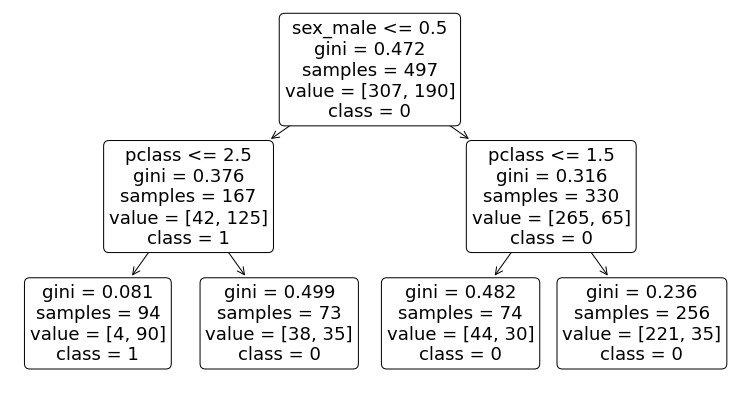

In [265]:
plt.figure(figsize=(13, 7))
clf1 = clf1.fit(X_train, y_train)
plot_tree(clf1, feature_names=X_train.columns, class_names=clf1.classes_, rounded=True)

In [266]:
y_pred = clf.predict(X_train)
print(f'training score: {clf1.score(X_train, y_train):.2%}')
y_pred[0:5]

training score: 79.07%


array([0, 1, 0, 1, 1])

In [267]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.60465116, 0.39534884],
       [0.        , 1.        ],
       [0.91304348, 0.08695652],
       [0.        , 1.        ],
       [0.13333333, 0.86666667]])

In [268]:
#males and females
y_train.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [283]:
TP = ((train.survived == 1) & (clf.predict(X_train) == 1)).sum()
FP = ((train.survived == 0) & (clf.predict(X_train) == 1)).sum()
TN = ((train.survived == 0) & (clf.predict(X_train) == 0)).sum()
FN = ((train.survived == 1) & (clf.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.survived, clf.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, clf1.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, clf.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, clf.predict(X_train)):.2%}')
print(f'support: {clf.predict(X_train).sum()}')

accuracy: 84.51%


ValueError: pos_label=1 is not a valid label. It should be one of ['0', '1']

[Text(0.5, 0.9, 'sex_male <= 0.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = 0'),
 Text(0.25, 0.7, 'pclass <= 2.5\ngini = 0.376\nsamples = 167\nvalue = [42, 125]\nclass = 1'),
 Text(0.125, 0.5, 'passenger_id <= 205.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(0.0625, 0.3, 'passenger_id <= 197.0\ngini = 0.305\nsamples = 16\nvalue = [3, 13]\nclass = 1'),
 Text(0.03125, 0.1, 'gini = 0.231\nsamples = 15\nvalue = [2, 13]\nclass = 1'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.1875, 0.3, 'fare <= 143.025\ngini = 0.025\nsamples = 78\nvalue = [1, 77]\nclass = 1'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 70\nvalue = [0, 70]\nclass = 1'),
 Text(0.21875, 0.1, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = 1'),
 Text(0.375, 0.5, 'fare <= 19.735\ngini = 0.499\nsamples = 73\nvalue = [38, 35]\nclass = 0'),
 Text(0.3125, 0.3, 'passenger_id <= 490.0\ngini = 0.485\nsamples = 58\nvalue = [24, 34]\nclass = 1'),
 Text(0.28

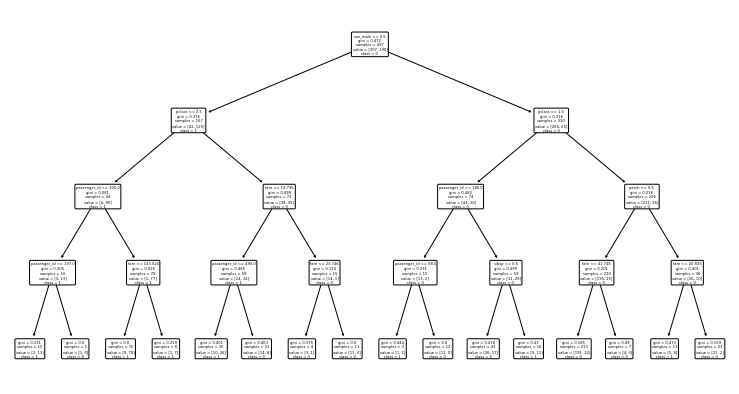

In [271]:
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
plt.figure(figsize=(13, 7))
clf = clf.fit(X_train, y_train)
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

In [280]:
print(f'training score: {clf.score(X_train, y_train):.2%}')

training score: 84.51%


In [284]:
pd.DataFrame(met.classification_report(train.survived, clf1.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.751861,0.957447,0.790744,0.854654,0.830455
recall,0.986971,0.473684,0.790744,0.730327,0.790744
f1-score,0.853521,0.633803,0.790744,0.743662,0.769524
support,307.000000,190.000000,0.790744,497.000000,497.000000


In [273]:
print(f'CLF Accuracy: {met.accuracy_score(train.survived, clf.predict(X_train)):.2%}')
print(f'CLF-1 Accuracy: {met.accuracy_score(train.survived, clf1.predict(X_train)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(train.survived, baseline_train):.2%}')
#model CLF perform the best out of all the models

CLF Accuracy: 84.51%
CLF-1 Accuracy: 79.07%
Baseline Accuracy: 61.77%


In [279]:
# Which model performs better on your in-sample data?
# CLD-1 was the most accuracy
print(f'CLF Accuracy: {met.accuracy_score(val.survived, clf.predict(X_val)):.2%}')
print(f'CLF-1 Accuracy: {met.accuracy_score(val.survived, clf1.predict(X_val)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(val.survived, baseline_val):.2%}')

CLF Accuracy: 74.30%
CLF-1 Accuracy: 78.04%
Baseline Accuracy: 61.68%
